In [1]:
import pandas as pd
import numpy as np

In [2]:
df_stats = pd.read_csv('data.csv')
df_stats = df_stats.drop('Unnamed: 30', axis=1)
df_stats

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards,WAR
0,1954,20,MLN,NL,122.0,509.0,468.0,58.0,131.0,27.0,...,104.0,209.0,13.0,3.0,6.0,4.0,0.0,*79/H,RoY-4,143.0
1,1962,22,MLN,NL,141.0,382.0,334.0,54.0,77.0,20.0,...,86.0,125.0,10.0,0.0,4.0,3.0,0.0,*37H/45,NaN,-2.8
2,1998,25,CHW,AL,89.0,261.0,244.0,33.0,68.0,14.0,...,104.0,120.0,2.0,0.0,2.0,5.0,1.0,897H/D,NaN,-1.4
3,1994,25,FLA,NL,101.0,371.0,345.0,41.0,86.0,17.0,...,76.0,136.0,5.0,5.0,3.0,2.0,1.0,*6/H,NaN,0.5
4,2006,25,FLA,NL,111.0,281.0,255.0,39.0,54.0,12.0,...,58.0,85.0,2.0,3.0,4.0,1.0,2.0,8H9/7,NaN,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,1973,24,PIT,NL,103.0,354.0,333.0,44.0,108.0,23.0,...,147.0,175.0,8.0,0.0,0.0,0.0,0.0,97H,RoY-9,25.1
4379,2006,25,TBD,AL,52.0,198.0,183.0,10.0,41.0,6.0,...,48.0,57.0,2.0,0.0,2.0,3.0,1.0,6/H,NaN,44.5
4380,2001,26,CHC,NL,49.0,118.0,106.0,11.0,23.0,3.0,...,83.0,44.0,3.0,3.0,0.0,1.0,1.0,3H,NaN,-0.2
4381,1992,25,BOS,AL,124.0,432.0,392.0,46.0,108.0,19.0,...,85.0,138.0,6.0,4.0,7.0,4.0,1.0,*879H/D,NaN,-0.7


In [3]:
df_stats.dropna(subset=['OBP', 'SLG', 'OPS', 'OPS+'], inplace=True)

In [4]:
df_stats['WAR'].describe()

count    4382.000000
mean        8.377430
std        16.095728
min        -6.900000
25%        -0.400000
50%         1.500000
75%        10.500000
max       162.800000
Name: WAR, dtype: float64

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train = df_stats[['R', 'TB', 'BA', 'AB', 'G', 'OPS+', 'RBI']]
y_train = df_stats['WAR']

ct = make_column_transformer(
      (StandardScaler(), ['R', 'TB', 'BA', 'RBI', 'AB', 'G', 'OPS+']),
      remainder="drop"  # all other columns in X will be dropped.
  )

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=15)
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['R', 'TB', 'BA', 'RBI', 'AB',
                                                   'G', 'OPS+'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=15))])

In [6]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 35),
                           },
                           scoring="neg_mean_squared_error",
                           cv=10)
grid_search.fit(X_train, y_train)
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

In [7]:
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)
df_cv_results_["param_kneighborsregressor__n_neighbors"] = df_cv_results_["param_kneighborsregressor__n_neighbors"].astype(int)

df_cv_results_.set_index("param_kneighborsregressor__n_neighbors", inplace = True)
df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
param_kneighborsregressor__n_neighbors,,,,,,,,,,,,,,,,,,
1,0.018880,0.003475,0.014741,0.002600,{'kneighborsregressor__n_neighbors': 1},-468.432232,-320.867153,-360.228858,-384.261005,-316.176667,-349.097648,-416.319041,-421.019087,-415.106826,-371.973676,-382.348219,45.823344,34
2,0.011134,0.002507,0.010761,0.002470,{'kneighborsregressor__n_neighbors': 2},-383.518485,-260.140797,-271.290200,-274.917215,-264.415474,-274.470828,-285.150805,-298.913139,-289.221929,-301.740046,-290.377892,33.690524,33
3,0.010184,0.001739,0.010792,0.001747,{'kneighborsregressor__n_neighbors': 3},-371.554844,-242.822483,-236.344254,-250.857217,-215.139168,-223.742603,-246.567783,-270.679990,-262.035685,-273.114115,-259.285814,41.443140,32
4,0.009676,0.000966,0.010534,0.001177,{'kneighborsregressor__n_neighbors': 4},-359.340719,-228.896239,-232.451046,-252.196159,-200.938861,-222.094970,-231.798042,-261.937275,-246.267882,-253.139078,-248.906027,40.478218,31
5,0.009954,0.001125,0.011595,0.002241,{'kneighborsregressor__n_neighbors': 5},-335.904635,-213.407589,-223.730901,-236.869491,-190.462131,-219.663264,-220.378380,-254.959759,-228.804837,-239.461291,-236.364228,36.944767,30
6,0.017877,0.004584,0.018083,0.005841,{'kneighborsregressor__n_neighbors': 6},-319.539554,-207.560787,-219.307150,-235.931344,-176.593011,-212.838224,-215.557914,-252.363049,-221.833163,-235.346183,-229.687038,35.524893,29
7,0.015566,0.001449,0.020915,0.005474,{'kneighborsregressor__n_neighbors': 7},-309.062472,-204.675328,-210.442400,-233.218140,-179.301186,-209.501982,-208.409136,-253.010207,-213.556238,-231.744996,-225.292208,33.649744,28
8,0.019330,0.004674,0.019498,0.006570,{'kneighborsregressor__n_neighbors': 8},-303.355857,-198.024868,-209.948791,-229.066358,-177.229258,-210.677543,-205.972733,-247.127499,-210.801306,-227.536675,-221.974089,32.504904,27
9,0.016896,0.002848,0.023948,0.008243,{'kneighborsregressor__n_neighbors': 9},-306.662979,-192.339410,-210.073555,-223.651824,-176.009901,-210.626286,-206.003986,-243.579835,-206.395951,-229.180824,-220.452455,33.807770,26


In [8]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
33,0.025827,0.013118,0.041257,0.013069,34,{'kneighborsregressor__n_neighbors': 34},-301.273631,-171.910274,-199.069904,-207.117059,-152.537480,-198.708013,-198.281542,-231.451402,-194.348586,-215.686128,-207.038402,37.584577,1
31,0.016761,0.002766,0.029780,0.011230,32,{'kneighborsregressor__n_neighbors': 32},-302.320304,-171.430726,-199.474728,-207.363340,-153.401769,-198.890053,-197.648839,-232.238904,-194.840079,-214.027533,-207.163628,37.772828,2
32,0.024058,0.010259,0.036237,0.011610,33,{'kneighborsregressor__n_neighbors': 33},-301.276393,-172.336920,-199.307973,-207.530781,-153.267834,-198.191208,-197.287027,-232.638445,-194.722485,-215.388900,-207.194797,37.531533,3
30,0.024648,0.011598,0.036962,0.011765,31,{'kneighborsregressor__n_neighbors': 31},-302.107756,-171.863512,-199.344230,-207.418599,-155.242899,-198.239377,-197.963039,-232.888074,-195.377036,-214.171669,-207.461619,37.457502,4
29,0.021033,0.009976,0.031369,0.009006,30,{'kneighborsregressor__n_neighbors': 30},-302.326270,-173.294906,-199.525003,-208.431477,-153.544737,-197.594915,-198.801914,-233.706655,-195.560867,-213.342040,-207.612879,37.649369,5
28,0.016728,0.004479,0.024765,0.003766,29,{'kneighborsregressor__n_neighbors': 29},-301.797487,-174.594435,-199.020492,-208.453410,-154.176197,-198.541983,-198.115026,-233.137225,-196.029550,-214.140749,-207.800656,37.271154,6
27,0.018868,0.005006,0.031616,0.012966,28,{'kneighborsregressor__n_neighbors': 28},-302.518176,-175.430423,-200.048373,-209.143596,-154.309000,-198.142498,-197.985942,-233.733632,-195.201073,-212.982553,-207.949527,37.403218,7
26,0.024243,0.007741,0.032203,0.011776,27,{'kneighborsregressor__n_neighbors': 27},-302.630147,-175.945738,-199.922679,-210.416531,-155.427377,-198.358123,-198.858509,-233.993224,-194.695884,-212.658470,-208.290668,37.238878,8
25,0.020281,0.007249,0.025724,0.006626,26,{'kneighborsregressor__n_neighbors': 26},-302.150444,-177.434624,-200.681878,-209.742063,-155.940559,-198.125447,-198.294966,-233.439036,-197.111709,-213.925547,-208.684627,36.814593,9
24,0.015934,0.001886,0.029785,0.009871,25,{'kneighborsregressor__n_neighbors': 25},-301.672268,-176.994184,-199.993996,-208.597901,-156.654061,-197.262640,-199.994301,-235.034259,-196.876898,-214.465814,-208.754632,36.751574,10


<Axes: title={'center': 'kNN Models with Varying K'}, xlabel='k', ylabel='test error'>

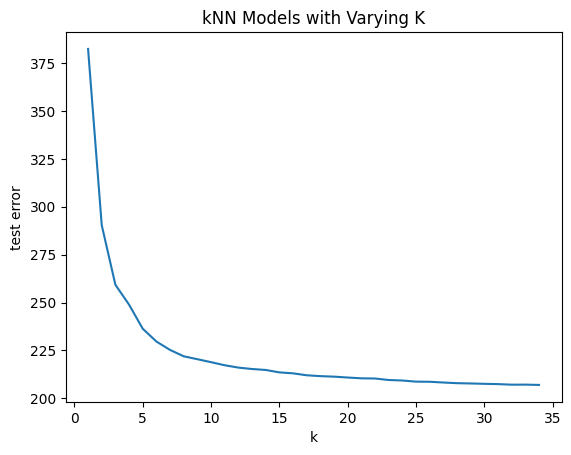

In [9]:
(-df_cv_results_["mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", title = "kNN Models with Varying K")

The test error seems to flatten out around k = 15. To create a simpler model, we will use that as our k for kNN.

In [10]:
np.sqrt(-df_cv_results_.loc[14]['mean_test_score'])

14.657471948159866

Using our best kNN model, we get an error of 14.66 WAR.

In [11]:
from sklearn.linear_model import LinearRegression

X_train = df_stats[['R', 'TB', 'BA', 'RBI', 'AB', 'G', 'OPS+']]
y_train = df_stats['WAR']

linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train)

print(np.sqrt(-cross_val_score(linear_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.265624928120552


In [12]:
from sklearn.ensemble import VotingRegressor

X_train = df_stats[['R', 'TB', 'BA', 'RBI', 'AB', 'G', 'OPS+']]
y_train = df_stats['WAR']


ensemble_model = VotingRegressor([
    ("linear", linear_model),
    ("knn", pipeline)
])
ensemble_model.fit(X=X_train, y=y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['R',
                                                                                'TB',
                                                                                'BA',
                                                                                'RBI',
                                                                                'AB',
                                                                                'G',
                                                                                'OPS+'])])),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor(n_neighbors=15))]))])

In [13]:
print(np.sqrt(-cross_val_score(ensemble_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.305620225809125


In [14]:
from sklearn.ensemble import StackingRegressor

X_train = df_stats[['R', 'TB', 'BA', 'RBI', 'AB', 'G', 'OPS+']]
y_train = df_stats['WAR']

stacking_model = StackingRegressor([
    ("linear", linear_model),
    ("knn", pipeline)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X_train, y=y_train)

stacker = stacking_model.final_estimator_

print(np.sqrt(-cross_val_score(stacking_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.255783821384256


The stacking ensemble model uses k-nearest neighbors with a k of 15. This k was determined by looking at the RMSE for k values 1 through 35. While 15 did not yield the lowest value, the graph seemed to flatten out around 15, so we decided to take the simpler model instead. The stacking model in general seemed to heavily favor the linear regression model.

The stacking ensemble model gives us the best RMSE at 14.256.

### Final Model

In [15]:
linear_model

LinearRegression()

Our linear regression model gives us an RMSE of 14.266 while the stacking model gave us a RMSE of 14.256. While the stacking model gives us the best RMSE, the linear regression model is far simpler, so that is our final model. Here are our final coefficients and intercept.

In [16]:
coefs = [round(coef, 3) for coef in list(linear_model.coef_)]
coefs

[0.327, 0.071, -31.278, 0.024, -0.016, -0.109, 0.061]

In [17]:
linear_model.intercept_

6.494283973301867

Mean RMSE:

In [18]:
meanWAR = df_stats['WAR'].mean()
meanWAR

8.377430397078959

In [19]:
rmse = np.sqrt(((df_stats['WAR'] - meanWAR) ** 2).sum() / len(df_stats))
rmse

16.093891118217112

## Exploration

This section aims to simply explore the predictions.

In [20]:
df_stats['Diff'] = stacking_model.predict(X_train) - df_stats['WAR']

In [21]:
df_stats.sort_values(by='Diff')

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,TB,GDP,HBP,SH,SF,IBB,Pos,Awards,WAR,Diff
390,1986,21,PIT,NL,113.0,484.0,413.0,72.0,92.0,26.0,...,172.0,4.0,2.0,2.0,2.0,2.0,*8/H,RoY-6,162.8,-137.520105
2558,1951,20,NYG,NL,121.0,524.0,464.0,59.0,127.0,22.0,...,219.0,11.0,2.0,1.0,NaN,7.0,*8,RoY-1,156.1,-133.180062
0,1954,20,MLN,NL,122.0,509.0,468.0,58.0,131.0,27.0,...,209.0,13.0,3.0,6.0,4.0,0.0,*79/H,RoY-4,143.0,-120.217515
3396,1995,19,SEA,AL,48.0,149.0,142.0,15.0,33.0,6.0,...,58.0,0.0,0.0,1.0,0.0,0.0,6/HD,NaN,117.5,-110.881856
2984,1927,18,NYG,NL,82.0,180.0,163.0,23.0,46.0,7.0,...,62.0,NaN,0.0,4.0,NaN,1.0,H87,NaN,110.9,-105.641914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,1940,23,BSN,NL,149.0,632.0,569.0,84.0,160.0,23.0,...,262.0,5.0,3.0,1.0,NaN,6.0,*7/H,NaN,3.0,26.999061
773,2009,24,FLA,NL,128.0,565.0,504.0,84.0,162.0,31.0,...,232.0,3.0,4.0,3.0,1.0,2.0,*7/H4,"MVP-28,RoY-1",1.1,27.108047
3181,1935,26,WSH,AL,139.0,604.0,551.0,88.0,172.0,26.0,...,236.0,NaN,4.0,12.0,NaN,2.0,*8/H49,NaN,-0.2,27.187825
3354,1938,25,PIT,NL,143.0,617.0,555.0,97.0,167.0,31.0,...,285.0,16.0,5.0,3.0,NaN,2.0,*7/H,MVP-6,8.0,28.085712


In [22]:
df_stats.WAR.describe()

count    4382.000000
mean        8.377430
std        16.095728
min        -6.900000
25%        -0.400000
50%         1.500000
75%        10.500000
max       162.800000
Name: WAR, dtype: float64

The model is really poor at predicting at the extremes. Players with WAR's over 100 yield the biggest difference between predicted and actual WAR.

# Other Models Attempted

In [23]:
X_train = df_stats[['HR', 'RBI', 'OPS+', 'TB', 'SO']]
y_train = df_stats['WAR']

In [24]:
ct = make_column_transformer(
      (StandardScaler(), ['HR', 'RBI', 'OPS+', 'TB', 'SO']),
      remainder="drop"  # all other columns in X will be dropped.
  )

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['HR', 'RBI', 'OPS+', 'TB',
                                                   'SO'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [25]:
grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 35)
                           },
                           scoring="neg_mean_squared_error",
                           cv=10)
grid_search.fit(X_train, y_train)
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

In [26]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
27,0.009307,0.000932,0.011974,0.000532,28,{'kneighborsregressor__n_neighbors': 28},-317.094826,-176.547981,-207.218228,-216.607246,-164.229056,-210.549947,-206.726171,-239.239254,-192.268278,-225.097865,-215.557885,39.792117,1
26,0.009014,0.001082,0.012903,0.002910,27,{'kneighborsregressor__n_neighbors': 27},-318.499920,-176.508364,-207.916771,-216.896817,-163.682519,-210.964562,-205.460701,-240.219552,-192.200922,-223.745289,-215.609542,40.270293,2
33,0.008601,0.000730,0.012421,0.000437,34,{'kneighborsregressor__n_neighbors': 34},-317.388397,-176.505951,-206.678542,-220.335868,-160.757819,-207.809985,-206.837506,-242.787377,-194.240423,-224.228205,-215.757007,40.504269,3
25,0.008824,0.000511,0.012284,0.001694,26,{'kneighborsregressor__n_neighbors': 26},-318.145177,-176.782881,-209.161118,-217.191892,-164.215193,-210.774112,-206.017780,-239.639868,-191.630929,-224.198185,-215.775714,40.059747,4
32,0.008398,0.000320,0.012586,0.000752,33,{'kneighborsregressor__n_neighbors': 33},-316.470529,-177.388093,-206.650697,-219.993640,-160.791558,-208.876922,-208.441969,-242.278628,-193.852661,-224.108585,-215.885328,40.113698,5
28,0.008739,0.000966,0.011809,0.000497,29,{'kneighborsregressor__n_neighbors': 29},-316.720756,-177.058905,-207.179507,-217.731073,-163.865405,-210.203692,-208.317480,-239.787902,-192.586589,-225.857397,-215.930871,39.703506,6
31,0.008437,0.000591,0.012078,0.000375,32,{'kneighborsregressor__n_neighbors': 32},-316.068623,-177.040269,-207.052755,-220.056612,-162.212259,-209.123937,-208.424778,-241.721964,-193.231850,-225.343149,-216.027620,39.866251,7
30,0.008774,0.000635,0.012621,0.000717,31,{'kneighborsregressor__n_neighbors': 31},-315.725803,-176.951622,-207.647154,-219.216417,-163.738786,-209.124960,-207.920646,-241.904359,-193.619336,-225.811797,-216.166088,39.575029,8
29,0.009015,0.001350,0.012900,0.002078,30,{'kneighborsregressor__n_neighbors': 30},-316.888862,-177.432619,-208.215676,-218.763192,-163.648769,-209.580001,-207.753856,-241.320741,-192.687940,-225.982492,-216.227415,39.834442,9
24,0.009080,0.001118,0.012076,0.001133,25,{'kneighborsregressor__n_neighbors': 25},-320.410796,-177.259963,-208.829082,-217.328247,-166.287934,-212.003487,-206.065813,-242.716226,-190.976686,-224.394482,-216.627272,40.556129,10


In [27]:
np.sqrt(-df_cv_results_.loc[15]['mean_test_score'])

14.844953279721818

In [28]:
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train)

print(np.sqrt(-cross_val_score(linear_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.477621919881003


In [29]:
ensemble_model = VotingRegressor([
    ("linear", linear_model),
    ("knn", pipeline)
])
ensemble_model.fit(X=X_train, y=y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('knn',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['HR',
                                                                                'RBI',
                                                                                'OPS+',
                                                                                'TB',
                                                                                'SO'])])),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor(n_neighbors=10))]))])

In [30]:
print(np.sqrt(-cross_val_score(ensemble_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.570195265702125


In [31]:
stacking_model = StackingRegressor([
    ("linear", linear_model),
    ("knn", pipeline)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X_train, y=y_train)

stacker = stacking_model.final_estimator_

print(np.sqrt(-cross_val_score(stacking_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.471801792526897


The best RMSE for these features among all algorithms tried previously is 14.47. Because this is slightly higher than other feature sets, and doesn't provide much more simplicity than other feature sets, it was not selected.

In [32]:
X_train = df_stats[['H', 'BA', 'OBP', 'BB', 'R']]
y_train = df_stats['WAR']

In [33]:
ct = make_column_transformer(
      (StandardScaler(), ['H', 'BA', 'OBP', 'BB', 'R']),
      remainder="drop"  # all other columns in X will be dropped.
  )

pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['H', 'BA', 'OBP', 'BB',
                                                   'R'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [34]:
grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 35)
                           },
                           scoring="neg_mean_squared_error",
                           cv=10)
grid_search.fit(X_train, y_train)
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

In [35]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
33,0.013528,0.001144,0.020008,0.004486,34,{'kneighborsregressor__n_neighbors': 34},-308.414502,-175.199419,-197.353419,-216.557375,-167.409439,-209.838343,-200.134719,-238.714516,-193.666560,-229.049397,-213.633769,37.858786,1
32,0.009852,0.003235,0.012912,0.002289,33,{'kneighborsregressor__n_neighbors': 33},-307.480789,-175.127185,-197.115900,-217.485050,-167.580402,-210.565681,-199.652534,-238.241152,-193.822789,-229.346389,-213.641787,37.614329,2
30,0.010056,0.001781,0.012213,0.001467,31,{'kneighborsregressor__n_neighbors': 31},-308.419523,-173.676923,-197.249436,-216.242662,-168.293341,-210.052234,-201.344287,-239.405919,-195.290522,-228.254125,-213.822897,37.801891,3
31,0.008555,0.000470,0.011248,0.000492,32,{'kneighborsregressor__n_neighbors': 32},-307.859874,-174.326469,-196.848463,-217.121186,-168.041759,-210.938245,-201.027959,-239.386838,-195.031641,-228.948209,-213.953064,37.689664,4
29,0.008641,0.000721,0.011610,0.000879,30,{'kneighborsregressor__n_neighbors': 30},-308.949734,-174.908053,-197.991767,-216.022124,-168.488564,-208.624351,-202.851843,-241.216335,-197.278616,-226.944973,-214.327636,37.703166,5
28,0.008501,0.000517,0.010842,0.000511,29,{'kneighborsregressor__n_neighbors': 29},-309.612859,-175.051444,-198.227859,-214.751998,-169.154909,-208.688871,-204.265900,-241.440714,-197.751726,-226.987045,-214.593333,37.715143,6
27,0.008686,0.000598,0.011585,0.001362,28,{'kneighborsregressor__n_neighbors': 28},-310.527810,-176.453364,-197.785787,-214.962555,-168.766605,-209.507660,-205.422046,-241.072859,-200.143081,-226.946555,-215.158832,37.696360,7
26,0.009406,0.001969,0.010885,0.000826,27,{'kneighborsregressor__n_neighbors': 27},-310.113160,-178.054423,-197.678846,-217.342528,-169.341066,-210.887088,-206.904932,-240.489356,-199.466432,-226.464973,-215.674280,37.285495,8
25,0.009568,0.002421,0.011880,0.001774,26,{'kneighborsregressor__n_neighbors': 26},-310.961263,-180.612097,-199.166179,-216.968321,-168.680749,-210.292592,-205.340905,-241.863795,-199.091138,-226.748755,-215.972580,37.429850,9
24,0.008585,0.000338,0.010716,0.000732,25,{'kneighborsregressor__n_neighbors': 25},-313.091071,-178.973943,-199.263064,-216.912006,-169.510740,-209.968646,-206.280513,-241.942967,-199.551686,-226.490097,-216.198473,37.978799,10


In [36]:
np.sqrt(-df_cv_results_.loc[12]['mean_test_score'])

14.849051820079895

In [37]:
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train)

print(np.sqrt(-cross_val_score(linear_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.476257448793552


In [38]:
stacking_model = StackingRegressor([
    ("linear", linear_model),
    ("knn", pipeline)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X_train, y=y_train)

stacker = stacking_model.final_estimator_

print(np.sqrt(-cross_val_score(stacking_model, X=X_train, y=y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()))

14.453096258466132


The best test RMSE for various algorithms with this feature set is 14.45, which is higher than other feature sets. Because this feature set does not provide much simplicity over the others, there isn't an advantage to it, so we will not select it.